# Comparing Neighbourhoods in København and Malmö

### Introduction / Problem Description

People relocate to different cities due to work, relationships, change in their kid's school or for other personal reasons. When they move to a new neighbourhood, wouldn't it be useful if they could compare this neighbourhood to the neighbourhood they previously lived in? I certainly will find such comparison really handy to make a decision. So over here, I have shown the similarities between the neighbourhoods in Copenhagen and Malmö the capital city of Denmark and Sweden. There is also constant relocation within a city. One such reason is when a person buys a new apartment/house in a different neighbourhood.

Apart from moving between nearby cities, a lot of people have migrated to Scandinavia in the past two decades and continue to do so. As of 2017, the total immigrant population in Denmark and Sweden was 768,275 and 1,877,050 respectively. This data is also helpful to them to see how the neighbourhoods differ from each other and what the attractive venues the neighbourhood can provide to them and their family.

Additionally, the results of this project can be used by business owners to see which venues are a shortage or doesn't exist in a particular neighbourhood. They can then make an informed decision on creating an appropriate business in that neighbourhood to always have customers and guaranteed profits.

In [142]:
# The code was removed by Watson Studio for sharing.

### Data used in this project

The data contains the list of neighbourhoods in Copenhagen and Malmö along with their respective geographical coordinates, list of venues (obtained by Foursquare APIs).

###  Methodology 

Importing standard libraries and obtain data from excel and wikipedia.

In [22]:
# The code was removed by Watson Studio for sharing.

In [23]:
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#For Copenhagen, Denmark (data from excel)
Denmark_districts = pd.read_excel(body)
Denmark_districts = Denmark_districts.drop(['Postal Code'], axis=1)
print(Denmark_districts.shape)
Denmark_districts.head()

(48, 2)


,District,Neighbourhood
0,Copenhagen,Frederiksberg
1,Copenhagen,Copenhagen Ø
2,Copenhagen,Nordhavn
3,Copenhagen,Copenhagen N
4,Copenhagen,Copenhagen S


In [25]:
#For Malmo, Sweden (web scrapping)
Malmo_districts2 = pd.read_html('https://en.wikipedia.org/wiki/Malm%C3%B6_Municipality#City_districts')
Malmo_districts = Malmo_districts2[3]

# Data Cleaning
Malmo_districts = Malmo_districts.drop(['Population[9]', 'Area(hectare)[10]', 'Density(people/km²)'], axis=1)
Malmo_districts.rename(columns={'City district':'Neighbourhood'}, inplace=True)
Malmo_districts["District"] = "Malmö"
Malmo_districts = Malmo_districts[["District", "Neighbourhood"]]
print(Malmo_districts.shape)
Malmo_districts.head()

(10, 2)


,District,Neighbourhood
0,Malmö,Centrum
1,Malmö,Fosie
2,Malmö,Limhamn-Bunkeflo
3,Malmö,Södra Innerstaden
4,Malmö,Västra Innerstaden


In [263]:
#Combine the rows of Denmark_districts and Malmo_districts
Total_districts = pd.concat([Denmark_districts, Malmo_districts], ignore_index=True, sort=False)
print('Size is {}'.format(Total_districts.shape))
Total_districts.head(10)

Size is (58, 2)


,District,Neighbourhood
0,Copenhagen,Frederiksberg
1,Copenhagen,Copenhagen Ø
2,Copenhagen,Nordhavn
3,Copenhagen,Copenhagen N
4,Copenhagen,Copenhagen S
5,Copenhagen,Copenhagen NV
6,Copenhagen,Copenhagen SV
7,Copenhagen,Valby
8,Copenhagen,Glostrup
9,Copenhagen,Brøndby


In [27]:
# The code was removed by Watson Studio for sharing.

In [28]:
#Import standard libraries
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [265]:
#Add empty columns for geographical coordinates
Total_districts["Latitude"] = ""
Total_districts["Longitude"] = ""
Total_districts.head()

,District,Neighbourhood,Latitude,Longitude
0,Copenhagen,Frederiksberg,,
1,Copenhagen,Copenhagen Ø,,
2,Copenhagen,Nordhavn,,
3,Copenhagen,Copenhagen N,,
4,Copenhagen,Copenhagen S,,


In [266]:
# The code was removed by Watson Studio for sharing.

,District,Neighbourhood
0,Copenhagen,Frederiksberg
1,Copenhagen,Copenhagen Ø
2,Copenhagen,Nordhavn
3,Copenhagen,Copenhagen N
4,Copenhagen,Copenhagen S


In [267]:
# The code was removed by Watson Studio for sharing.

In [268]:
#Get the geographical coordinates (Latitude/Longitude)
for ind in Total_districts.index:
    address = Total_districts['Neighbourhood'][ind]
    geolocator = Nominatim(user_agent="DenSwed_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    Total_districts['Latitude'][ind] = latitude
    Total_districts['Longitude'][ind] = longitude

print('The geograpical coordinates of districts in Denmark and Sweden have been added to the table.')

The geograpical coordinates of districts in Denmark and Sweden have been added to the table.


In [269]:
# The code was removed by Watson Studio for sharing.

In [270]:
#Display the first 5 rows of neighbourhoods with their latitude and longitude
print('Size is {}'.format(Total_districts.shape))
Total_districts.head(10)

Size is (58, 4)


,District,Neighbourhood,Latitude,Longitude
0,Copenhagen,Frederiksberg,55.678,12.5326
1,Copenhagen,Copenhagen Ø,55.6867,12.5701
2,Copenhagen,Nordhavn,55.705,12.591
3,Copenhagen,Copenhagen N,43.8934,-75.6738
4,Copenhagen,Copenhagen S,-34.8382,138.481
5,Copenhagen,Copenhagen NV,39.4359,-119.715
6,Copenhagen,Copenhagen SV,55.6766,12.5695
7,Copenhagen,Valby,55.6618,12.517
8,Copenhagen,Glostrup,55.6692,12.396
9,Copenhagen,Brøndby,55.6441,12.4217


Remove outliers as some neighbourhoods have completely wrong geographical coordinates. Having these neighbourhoods causes problems when we plot with folium. For example the coordinates [-34.8382, 138.481] is a place in Adelaide, Australia.

In [271]:
from scipy import stats

mean = Total_districts.Latitude.mean()
indexNames = Total_districts[(Total_districts.Latitude < (mean - 4)) | (Total_districts.Latitude > (mean + 4))].index
Total_districts.drop(indexNames , inplace=True)
Total_districts = Total_districts.reset_index(drop=True)

In [273]:
#Processed data (notice the number of rows has reduced)
print('Size is {}'.format(Total_districts.shape))
Total_districts.head(20)

Size is (53, 4)


,District,Neighbourhood,Latitude,Longitude
0,Copenhagen,Frederiksberg,55.678,12.5326
1,Copenhagen,Copenhagen Ø,55.6867,12.5701
2,Copenhagen,Nordhavn,55.705,12.591
3,Copenhagen,Copenhagen SV,55.6766,12.5695
4,Copenhagen,Valby,55.6618,12.517
5,Copenhagen,Glostrup,55.6692,12.396
6,Copenhagen,Brøndby,55.6441,12.4217
7,Copenhagen,Rødovre,55.6812,12.4547
8,Copenhagen,Albertslund,55.6586,12.3563
9,Copenhagen,Vallensbæk,55.623,12.3845


In [274]:
#Create map of the neighborhoods using latitude and longitude values
#Seperate colours for the two cities
map_DenSwed = folium.Map(location=[latitude, longitude], zoom_start=4)

# Denmark
for lat, lng, neighborhood in zip(Total_districts['Latitude'][0:43], Total_districts['Longitude'][0:43], Total_districts['Neighbourhood'][0:43]):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='white',
        fill=True,
        fill_color='#FF0000',
        fill_opacity=1,
        parse_html=False).add_to(map_DenSwed)  
    
# Sweden
for lat, lng, neighborhood in zip(Total_districts['Latitude'][44:53], Total_districts['Longitude'][44:53], Total_districts['Neighbourhood'][44:53]):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#004B87',
        fill_opacity=1,
        parse_html=False).add_to(map_DenSwed) 
    
map_DenSwed

Defining Foursquare Credentials and Version (hidden from view) to get a list of attractive venues in each neighbourhood.

In [38]:
# The code was removed by Watson Studio for sharing.

In [39]:
#A function that returns a list of attractive venues (maximum 50) from each neighbourhood in a 1000 meter radius from the center

def getNearbyVenues(names, latitudes, longitudes, LIMIT=50, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Venue', 
                  'Venue Category',
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [67]:
# The code was removed by Watson Studio for sharing.

In [40]:
#We get the venue details of these neighbourhoods
DenSwed_venues = getNearbyVenues(names=Total_districts['Neighbourhood'], latitudes=Total_districts['Latitude'], longitudes=Total_districts['Longitude'])

 Frederiksberg
 Copenhagen Ø
 Nordhavn
 Copenhagen SV
 Valby
 Glostrup
 Brøndby
 Rødovre
 Albertslund
 Vallensbæk
 Taastrup
 Ishøj
 Hedehusene
 Hvidovre
 Brøndby Strand
 Vallensbæk Strand
 Greve
 Solrød Strand
 Karlslunde
 Brønshøj
 Vanløse
 Herlev
 Skovlunde
 Ballerup
 Måløv
 Smorum
 Kastrup
 Dragør
 Kongens Lyngby
 Gentofte
 Virum
 Holte
 Nærum
 Søborg
 Dyssegård
 Bagsværd
 Hellerup
 Charlottenlund
 Klampenborg
 Skodsborg
 Vedbæk
 Rungsted Kyst
 Hørsholm
 Kokkedal
Fosie
Limhamn-Bunkeflo
Södra Innerstaden
Västra Innerstaden
Hyllie
Rosengård
Husie
Kirseberg
Oxie


In [277]:
#A table clearly showing the venues, venue category, venue latitude and longitude for each neighbourhood
print('Size is {}'.format(DenSwed_venues.shape))
DenSwed_venues.head(10)

Size is (1071, 5)


,Neighbourhood,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Frederiksberg,Café Intime,Lounge,55.677221,12.532585
1,Frederiksberg,Frederiksberg Hovedbibliotek,Library,55.680724,12.530827
2,Frederiksberg,Creative Space,Art Gallery,55.677572,12.536766
3,Frederiksberg,Halifax,Burger Joint,55.680438,12.530850
4,Frederiksberg,Edison Teatret,Theater,55.676647,12.536828
5,Frederiksberg,Hi-Fi Klubben,Electronics Store,55.678346,12.533251
6,Frederiksberg,Restaurant Frederiks have,French Restaurant,55.679178,12.525047
7,Frederiksberg,Sokkelund Cafe & Brasserie,Café,55.679298,12.526044
8,Frederiksberg,Smalle Vine,Wine Shop,55.678974,12.528744
9,Frederiksberg,Forno a Legna,Pizza Place,55.682382,12.535324


Now, let's have a look a the number of venues retrieved from each neighbourhood using Foursquare.

In [ ]:
# The code was removed by Watson Studio for sharing.

In [48]:
DenSwed_venues_count = DenSwed_venues['Neighbourhood'].value_counts() #type series
DenSwed_venues_count = DenSwed_venues_count.reset_index() # type dataframe
DenSwed_venues_count.columns = ['Neighbourhood', 'Venue Counts']
print(DenSwed_venues_count.shape)
DenSwed_venues_count.head()

(53, 2)


,Neighbourhood,Venue Counts
0,Södra Innerstaden,50
1,Frederiksberg,50
2,Nordhavn,50
3,Kongens Lyngby,50
4,Valby,50


In [59]:
# The code was removed by Watson Studio for sharing.

With a horizontal bar chart, we see there are neighbourhoods (marked in red) with less than 10 venues. For these neighbourhoods there aren't enough data in Foursquare. Comparing neighbourhoods with less venues to the neighbourhoods with more venues isn't ideal. So the neighbourhoods (marked in red) are removed from the table. 

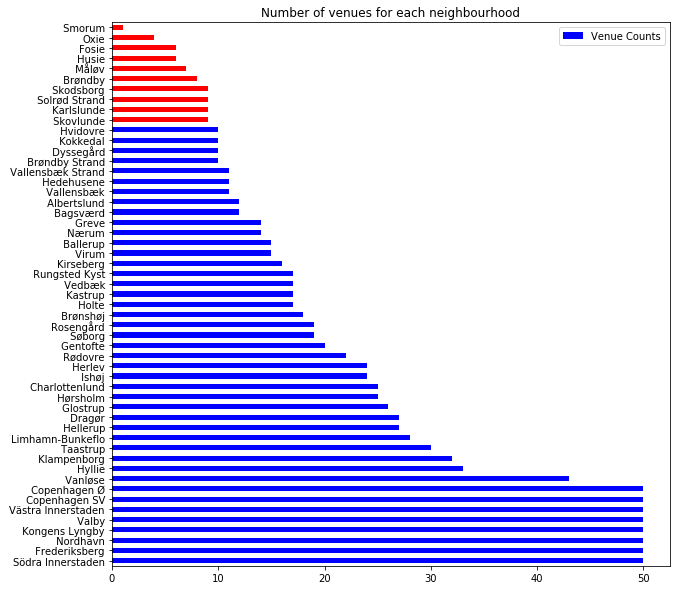

In [278]:
DenSwed_venues_count.plot(kind='barh', x='Neighbourhood', y='Venue Counts', color = colorS, figsize=(10, 10))
plt.ylabel('') # add y-label to the plot
plt.title("Number of venues for each neighbourhood")
plt.show()

The list of neighbourhoods that were removed.

In [51]:
indexNames = DenSwed_venues_count[ DenSwed_venues_count['Venue Counts'] < 10 ].index
remove = DenSwed_venues_count.iloc[indexNames]['Neighbourhood'].tolist()
remove

[' Skovlunde',
 ' Karlslunde',
 ' Solrød Strand',
 ' Skodsborg',
 ' Brøndby',
 ' Måløv',
 'Husie',
 'Fosie',
 'Oxie',
 ' Smorum']

In [ ]:
# The code was removed by Watson Studio for sharing.

The table is accordingly modified. The neighbourhoods (marked in red on the bar plot) are removed and notice the number of rows.

In [61]:
for ele in range(len(remove)):
    indexnames = DenSwed_venues[ DenSwed_venues['Neighbourhood'].str.contains(remove[ele]) ].index
    DenSwed_venues.drop(indexnames , inplace=True)

print(DenSwed_venues.shape)

(1071, 5)


The table is converted to a more readable form. The rows have been grouped by 'Neighbourhood' and the columns are the 'Venue Category'. This method is otherwise known as one hot encoding. 

In [279]:
# one hot encoding
DenSwed_onehot = pd.get_dummies(DenSwed_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
DenSwed_onehot['Neighbourhood'] = DenSwed_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [DenSwed_onehot.columns[-1]] + list(DenSwed_onehot.columns[:-1])
DenSwed_onehot = DenSwed_onehot[fixed_columns]

DenSwed_grouped = DenSwed_onehot.groupby('Neighbourhood').sum().reset_index()
print('Size is {}'.format(DenSwed_grouped.shape))
DenSwed_grouped.head()

Size is (42, 190)


,Neighbourhood,American Restaurant,Apres Ski Bar,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Bathing Area,Beach,Beer Bar,Beer Garden,Beer Store,Boat or Ferry,Bookstore,Botanical Garden,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Candy Store,Castle,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fraternity House,French Restaurant,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hockey Rink,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Outdoor Gym,Outlet Store,Palace,Park,Performing Arts Venue,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Racetrack,Ramen Restaurant,Rental Car Location,Rest Area,Restaurant,Rock Club,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track Stadium,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Albertslund,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Bagsværd,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ballerup,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Brønshøj,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,2,0,0,0,0,0

#### Notice there are too many columns and some of them have similar names, e.g., Art Gallery,  Art Musuem or Beer Bar,  Beer Store or Train,  Train Station. The grouping of similar columns is done and displayed below.

In [280]:
headers = ["Art", "Restaurant", "Beer", "Book", "Court", "Food", "Garden", "Fish", "Gym", "Hotel", "Museum", "Pizza", "Bar", "Park", "Club", "Zoo",
              "Train", "Stadium", "Field", "Sport", "Auto", "Bus", "Hockey"]
for header in headers:
    old_names = [col for col in DenSwed_grouped.columns if header in col]
    new_names = len(old_names)*[header]
    DenSwed_grouped.rename(columns=dict(zip(old_names, new_names)), inplace=True)
    
DenSwed_grouped = DenSwed_grouped.groupby(DenSwed_grouped.columns, axis=1).sum()

DenSwed_grouped = DenSwed_grouped[['Neighbourhood'] + [c for c in DenSwed_grouped if c not in ['Neighbourhood']]]
#København_grouped = København_grouped.loc[:, (København_grouped != 0).any(axis=0)]

print('Size is {}'.format(DenSwed_grouped.shape))
DenSwed_grouped.head()

Size is (42, 130)


,Neighbourhood,Art,Auto,BBQ Joint,Bagel Shop,Bakery,Bar,Bathing Area,Beach,Beer,Boat or Ferry,Book,Breakfast Spot,Brewery,Burger Joint,Bus,Butcher,Cafeteria,Café,Camera Store,Candy Store,Castle,Cemetery,Cheese Shop,Child Care Service,Church,Clothing Store,Club,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Court,Coworking Space,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Electronics Store,Factory,Farm,Farmers Market,Field,Fish,Flea Market,Flower Shop,Food,Fraternity House,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Harbor / Marina,Historic Site,Hockey,Hostel,Hot Dog Joint,Hotel,Hunting Supply,Ice Cream Shop,Indoor Play Area,Intersection,Kids Store,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Massage Studio,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Outlet Store,Palace,Park,Pharmacy,Pie Shop,Pizza,Platform,Playground,Plaza,Pool,Pub,Racetrack,Rental Car Location,Rest Area,Restaurant,Salad Place,Sandwich Place,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Sport,Stadium,Steakhouse,Supermarket,Taco Place,Tea Room,Theater,Toy / Game Store,Train,Video Store,Waterfront,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Albertslund,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,Bagsværd,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Ballerup,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Brønshøj,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,Charlottenlund,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,1,1,0,0,0,0,0


In [64]:
# The code was removed by Watson Studio for sharing.

['Restaurant', 'Grocery Store', 'Café', 'Bakery', 'Gym', 'Pizza', 'Supermarket', 'Park', 'Bar', 'Coffee Shop', 'Train', 'Ice Cream Shop', 'Burger Joint', 'Discount Store', 'Plaza', 'Bus', 'Shopping Mall', 'Hotel', 'Pharmacy', 'Convenience Store']


# Clustering by k-means

The elbow method is used to decide the appropriate number of clusters/groups. Either distortion or inertia can be used as the dependant variable.

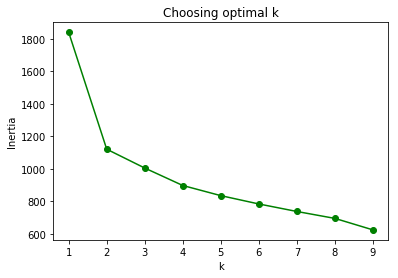

In [283]:
from scipy.spatial.distance import cdist

X = DenSwed_grouped.drop('Neighbourhood', 1)

distortions = []
inertias = [] 
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_) 

# Plot the elbow
plt.plot(K, inertias, 'go-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Choosing optimal k')
plt.show()

Inertia is the sum of squared distances of samples from the nearest cluster centre. We have to choose the point (value of 'k') from which the graph is linear. It is more linear from 'k = 5'. Choosing 'k = 2' would result in only 2 types of neighbourhoods. Such a result is not helpful to the reader and hence the value of 'k' is chosen as 5.

In [259]:
# set number of clusters
kclusters = 5

DenSwed_grouped_clustering = DenSwed_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DenSwed_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#print(type(kmeans.labels_))
kmeans.labels_

array([1, 1, 1, 1, 2, 4, 3, 2, 2, 4, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       1, 0, 3, 1, 2, 2, 1, 2, 3, 1, 1, 0, 1, 2, 2, 1, 2, 2, 3, 3],
      dtype=int32)

In [167]:
# The code was removed by Watson Studio for sharing.

<class 'pandas.core.frame.DataFrame'>


The count of the clusters/groups is shown.

In [202]:
print(labels_count.to_string(index=False))

 Cluster Label  Counts
             0       3
             1      17
             2      15
             3       5
             4       2


In [281]:
#Inserting the cluster label as second column to the table.
DenSwed_merged = pd.concat([DenSwed_grouped, labels2], axis=1)
DenSwed_merged.insert(1,'Cluster Label', labels2)
DenSwed_merged = DenSwed_merged.iloc[:, :-1]
print('Size is {}'.format(DenSwed_merged.shape))
DenSwed_merged.head()

Size is (42, 131)


,Neighbourhood,Cluster Label,Art,Auto,BBQ Joint,Bagel Shop,Bakery,Bar,Bathing Area,Beach,Beer,Boat or Ferry,Book,Breakfast Spot,Brewery,Burger Joint,Bus,Butcher,Cafeteria,Café,Camera Store,Candy Store,Castle,Cemetery,Cheese Shop,Child Care Service,Church,Clothing Store,Club,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Court,Coworking Space,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Electronics Store,Factory,Farm,Farmers Market,Field,Fish,Flea Market,Flower Shop,Food,Fraternity House,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Harbor / Marina,Historic Site,Hockey,Hostel,Hot Dog Joint,Hotel,Hunting Supply,Ice Cream Shop,Indoor Play Area,Intersection,Kids Store,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Massage Studio,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Outlet Store,Palace,Park,Pharmacy,Pie Shop,Pizza,Platform,Playground,Plaza,Pool,Pub,Racetrack,Rental Car Location,Rest Area,Restaurant,Salad Place,Sandwich Place,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Sport,Stadium,Steakhouse,Supermarket,Taco Place,Tea Room,Theater,Toy / Game Store,Train,Video Store,Waterfront,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Albertslund,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,Bagsværd,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Ballerup,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Brønshøj,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,Charlottenlund,2,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,1,1,0,0,0,0,0


In [282]:
# Adding the latitude and longitude values back
DenSwed_merged = DenSwed_merged.merge(Total_districts, on='Neighbourhood')
DenSwed_merged = DenSwed_merged.drop(['District'], axis=1)
print('Size is {}'.format(DenSwed_merged.shape))
DenSwed_merged.head()

Size is (42, 133)


,Neighbourhood,Cluster Label,Art,Auto,BBQ Joint,Bagel Shop,Bakery,Bar,Bathing Area,Beach,Beer,Boat or Ferry,Book,Breakfast Spot,Brewery,Burger Joint,Bus,Butcher,Cafeteria,Café,Camera Store,Candy Store,Castle,Cemetery,Cheese Shop,Child Care Service,Church,Clothing Store,Club,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Court,Coworking Space,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Electronics Store,Factory,Farm,Farmers Market,Field,Fish,Flea Market,Flower Shop,Food,Fraternity House,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Harbor / Marina,Historic Site,Hockey,Hostel,Hot Dog Joint,Hotel,Hunting Supply,Ice Cream Shop,Indoor Play Area,Intersection,Kids Store,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Massage Studio,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Outlet Store,Palace,Park,Pharmacy,Pie Shop,Pizza,Platform,Playground,Plaza,Pool,Pub,Racetrack,Rental Car Location,Rest Area,Restaurant,Salad Place,Sandwich Place,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Sport,Stadium,Steakhouse,Supermarket,Taco Place,Tea Room,Theater,Toy / Game Store,Train,Video Store,Waterfront,Wine Shop,Women's Store,Yoga Studio,Zoo,Latitude,Longitude
0,Albertslund,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,55.6586,12.3563
1,Bagsværd,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,55.7584,12.4573
2,Ballerup,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,55.7304,12.3612
3,Brønshøj,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,55.7041,12.4985
4,Charlottenlund,2,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,1,1,0,0,0,0,0,55.7553,12.5671


In [258]:
#visualizing the different clusters on the map
# create map
import random
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors2 = ['black', 'green', 'orange', 'blue', 'magenta']
#colors2 = ['green', 'orange']

# add markers to the map
markers_colors = []
for lat, lon, neigh, cluster in zip(DenSwed_merged['Latitude'], DenSwed_merged['Longitude'], DenSwed_merged['Neighbourhood'], DenSwed_merged['Cluster Label']):
    label = '{} | Cluster {}'.format(neigh, cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='white',
        fill=True,
        fill_color=colors2[cluster],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [166]:
# The code was removed by Watson Studio for sharing.

,Cluster Label,Art,Auto,BBQ Joint,Bagel Shop,Bakery,Bar,Bathing Area,Beach,Beer,Boat or Ferry,Book,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus,Butcher,Cafeteria,Café,Camera Store,Candy Store,Castle,Cemetery,Cheese Shop,Church,Clothing Store,Club,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Court,Coworking Space,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Electronics Store,Factory,Farm,Field,Fish,Flea Market,Flower Shop,Food,Fraternity House,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Harbor / Marina,Hardware Store,Historic Site,Hockey,Hostel,Hot Dog Joint,Hotel,Hunting Supply,Ice Cream Shop,Intersection,Kids Store,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Massage Studio,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Outlet Store,Palace,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pie Shop,Pizza,Platform,Playground,Plaza,Pool,Pub,Racetrack,Rental Car Location,Rest Area,Restaurant,Salad Place,Sandwich Place,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Sport,Stadium,Steakhouse,Supermarket,Taco Place,Theater,Toy / Game Store,Train,Video Game Store,Video Store,Waterfront,Wine Shop,Yoga Studio,Zoo
0,0,0.095238,0.000000,0.0,0.000000,0.428571,0.142857,0.000000,0.190476,0.0,0.00,0.047619,0.000000,0.00,0.00,0.142857,0.285714,0.0,0.047619,0.333333,0.0,0.095238,0.0,0.000000,0.0,0.047619,0.047619,0.095238,0.047619,0.0,0.047619,0.428571,0.047619,0.047619,0.142857,0.0,0.0,0.0,0.00,0.142857,0.047619,0.000000,0.523810,0.000000,0.142857,0.047619,0.047619,0.238095,0.000000,0.047619,0.047619,0.238095,0.0,0.000000,0.095238,0.0,0.00,0.380952,0.047619,0.047619,0.0,0.047619,0.047619,1.666667,1.000000,0.047619,0.047619,0.047619,0.190476,0.047619,0.0,0.190476,0.047619,0.190476,0.000000,0.000000,0.095238,0.0,0.000000,0.000000,0.0,0.047619,0.047619,0.142857,0.095238,0.095238,0.000000,0.095238,0.047619,0.000000,0.0,0.047619,0.571429,0.000000,0.190476,0.00,0.571429,0.047619,0.000000,0.238095,0.095238,0.047619,0.00,0.190476,0.000000,1.380952,0.000000,0.0,0.000000,0.380952,0.000000,0.00,0.000000,0.0,0.142857,0.285714,0.047619,0.571429,0.0,0.047619,0.095238,0.714286,0.000000,0.047619,0.00,0.0,0.0,0.00
1,1,0.750000,0.000000,0.0,0.000000,2.250000,2.250000,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.25,0.25,0.750000,0.000000,0.0,0.000000,1.750000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.500000,0.250000,1.500000,0.0,0.250000,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.25,0.250000,0.250000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.0,0.25,0.000000,0.250000,0.000000,0.5,0.000000,0.000000,1.500000,2.250000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.250000,0.500000,0.0,0.250000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,1.500000,0.000000,0.250000,0.25,2.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.25,0.000000,0.000000,9.250000,0.000000,0.5,0.000000,0.750000,0.250000,0.25,0.000000,0.0,0.500000,0.000000,0.000000,2.750000,0.5,0.000000,0.000000,1.000000,0.000000,0.250000,0.25,0.0,0.0,0.25
2,2,0.090909,0.181818,0.0,0.090909,1.272727,0.545455,0.090909,0.181818,0.0,0.00,0.181818,0.181818,0.00,0.00,0.272727,1.000000,0.0,0.090909,1.181818,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.545455,0.000000,0.454545,0.0,0.000000,0.363636,0.000000,0.272727,0.000000,0.0,0.0,0.0,0.00,0.181818,0.000000,0.181818,0.272727,0.090909,0.454545,0.000000,0.000000,0.000000,0.090909,0.181818,0.181818,0.272727,0.0,0.090909,0.363636,0.0,0.00,0.090909,0.000000,0.000000,0.0,0.090909,0.000000,2.000000,0.818182,0.181818,0.000000,0.090909,0.090909,0.090909,0.0,0.727273,0.000000,0.636364,0.181818,0.090909,0.090909,0.0,0.090

# Analysis

The clusters are grouped and their venues have been summed up to produce the table below.

In [260]:
DenSwed_merged2 = DenSwed_merged.groupby('Cluster Label').sum()
DenSwed_merged2.reset_index(inplace=True)
DenSwed_merged2.head()

,Cluster Label,Art,Auto,BBQ Joint,Bagel Shop,Bakery,Bar,Bathing Area,Beach,Beer,Boat or Ferry,Book,Breakfast Spot,Brewery,Burger Joint,Bus,Butcher,Cafeteria,Café,Camera Store,Candy Store,Castle,Cemetery,Cheese Shop,Child Care Service,Church,Clothing Store,Club,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Court,Coworking Space,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Electronics Store,Factory,Farm,Farmers Market,Field,Fish,Flea Market,Flower Shop,Food,Fraternity House,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Harbor / Marina,Historic Site,Hockey,Hostel,Hot Dog Joint,Hotel,Hunting Supply,Ice Cream Shop,Indoor Play Area,Intersection,Kids Store,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Massage Studio,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Outlet Store,Palace,Park,Pharmacy,Pie Shop,Pizza,Platform,Playground,Plaza,Pool,Pub,Racetrack,Rental Car Location,Rest Area,Restaurant,Salad Place,Sandwich Place,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Sport,Stadium,Steakhouse,Supermarket,Taco Place,Tea Room,Theater,Toy / Game Store,Train,Video Store,Waterfront,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,1,0,0,0,10,3,0,0,1,1,0,1,0,3,0,0,0,6,0,0,0,0,0,0,0,1,1,1,0,1,2,0,0,0,0,0,0,1,1,1,2,1,0,0,0,0,0,2,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,5,6,0,1,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,7,1,0,5,0,0,2,0,0,1,0,0,26,0,1,0,2,0,1,0,0,1,0,0,8,1,0,1,0,4,0,1,0,0,0,0
1,1,0,0,1,0,11,3,0,5,0,0,1,0,0,2,8,1,1,8,0,0,0,0,0,0,1,2,2,4,0,0,7,0,2,1,0,0,0,0,2,1,0,13,0,1,1,1,1,2,0,0,1,3,0,0,0,1,0,0,4,1,0,0,0,0,36,12,1,1,4,2,0,3,1,4,1,0,0,3,0,0,0,0,1,1,2,3,1,0,2,1,0,0,0,13,5,0,13,0,1,2,2,0,0,3,0,16,0,0,0,6,0,0,1,0,4,6,2,9,0,1,1,1,7,1,0,0,0,0,0
2,2,2,1,0,1,10,7,1,2,0,0,2,0,0,3,8,0,1,11,0,2,0,1,0,1,0,5,1,4,0,1,4,1,1,1,0,0,0,0,2,1,2,2,1,9,0,0,0,1,2,2,2,4,0,1,1,4,0,0,6,0,1,0,1,0,23,19,4,1,2,0,0,8,0,7,0,2,1,0,0,1,2,0,1,0,3,0,1,2,0,0,0,1,0,3,8,0,11,1,2,3,1,2,0,0,1,61,1,0,1,6,1,0,1,0,5,2,2,14,0,0,1,1,10,1,0,0,1,0,0
3,3,3,0,1,0,12,17,0,0,4,0,0,1,1,6,0,1,0,19,0,3,0,0,2,0,0,0,1,15,0,0,0,0,0,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,1,0,0,2,0,2,0,1,0,1,0,1,1,8,0,1,0,0,1,2,0,7,0,0,0,0,0,0,1,0,2,0,4,0,2,1,0,0,0,0,1,5,0,1,10,0,3,7,2,3,0,0,0,63,3,1,0,1,0,0,0,1,1,0,3,4,3,0,1,1,0,0,1,0,0,1,1
4,4,3,0,0,0,8,4,0,0,4,0,2,1,1,4,0,0,0,12,1,0,1,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,1,1,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,1,0,0,1,0,0,1,0,2,1,2,0,0,0,0,6,0,0,1,0,2,2,1,1,0,0,0,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,1


In [136]:
# Retrieving the 15 most attractive venues for each cluster. 
top15 =15*[None]
for ind in DenSwed_merged2.index:
    clusterR = DenSwed_merged2.iloc[[ind]].drop('Cluster Label', axis=1)
    clusterR.sort_values(ind, axis=1, ascending=False, inplace=True, kind='quicksort', na_position='last')
    top15[ind] = list(clusterR.columns[0:14])
    print('The most frequent venues seen in cluster {} are \n {}. \n'.format(ind, ', '.join(top15[ind])))

The most frequent venues seen in cluster 0 are 
 Restaurant, Bakery, Supermarket, Park, Gym, Café, Grocery Store, Pizza, Train, Burger Joint, Bar, Plaza, Diner, Shopping Mall. 

The most frequent venues seen in cluster 1 are 
 Grocery Store, Restaurant, Pizza, Park, Discount Store, Gym, Bakery, Supermarket, Café, Bus, Convenience Store, Train, Stadium, Shopping Mall. 

The most frequent venues seen in cluster 2 are 
 Restaurant, Grocery Store, Gym, Supermarket, Café, Pizza, Train, Bakery, Electronics Store, Bus, Pharmacy, Hotel, Bar, Ice Cream Shop. 

The most frequent venues seen in cluster 3 are 
 Restaurant, Café, Bar, Coffee Shop, Bakery, Pizza, Gym, Ice Cream Shop, Plaza, Burger Joint, Park, Movie Theater, Beer, Supermarket. 

The most frequent venues seen in cluster 4 are 
 Restaurant, Café, Bakery, Park, Bar, Burger Joint, Beer, Dessert Shop, Coffee Shop, Art, Book, Plaza, Playground, Theater. 



In [137]:
# To get the total venues of all clusters (removing repetition)
def common(list1, list2, list3, list4, list5,): 
    final_list = list(set(list1) | set(list2) | set(list3) | set(list4) | set(list5)) 
    #final_list = list(set(list1) & set(list2) & set(list3) & set(list4) & set(list5)) 
    return final_list 

LA5 = common(top15[0], top15[1], top15[2], top15[3], top15[4])
print('Size of the final list of venues to plot is {}.'.format(len(LA5)))
LA5

Size of the final list of venues to plot is 30.


['Café',
 'Electronics Store',
 'Plaza',
 'Movie Theater',
 'Theater',
 'Pizza',
 'Coffee Shop',
 'Stadium',
 'Convenience Store',
 'Grocery Store',
 'Discount Store',
 'Dessert Shop',
 'Playground',
 'Gym',
 'Train',
 'Bus',
 'Diner',
 'Pharmacy',
 'Restaurant',
 'Park',
 'Shopping Mall',
 'Supermarket',
 'Hotel',
 'Ice Cream Shop',
 'Burger Joint',
 'Beer',
 'Bakery',
 'Art',
 'Book',
 'Bar']

In [144]:
# The code was removed by Watson Studio for sharing.

# Heatmap

Illustration by a heatmap to see the venue count in each cluster. The colours were chosen to help the reader quickly find a specific venue count in any cluster.

[Text(159.0, 0.5, 'Venue Category'), Text(0.5, 69.0, 'Clusters')]

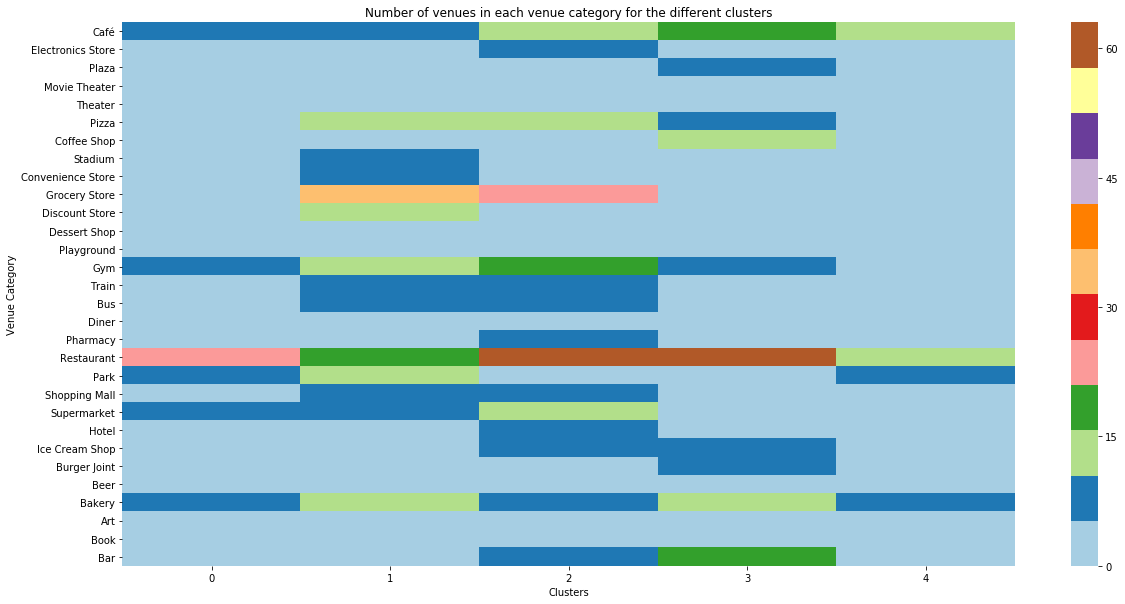

In [218]:
# heatmap: just a visualization
temp = DenSwed_merged2[LA5]
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(temp.transpose(), cmap=sns.color_palette("Paired"))
ax.set_title('Number of venues in each venue category for the different clusters')
ax.set(xlabel='Clusters', ylabel='Venue Category')

# Radar Chart

From the cluster count, we know the top two cluster labels are 1 and 2. These two clusters are differentiated in a radar chart. Plotting more than two clusters would be messy and might make the reader confused.

In [205]:
def common(list1, list2): 
    final_list = list(set(list1) | set(list2)) 
    return final_list 

LA12 = common(top15[1], top15[2])
print('Size of the final list of venues to plot is {}.'.format(len(LA12)))
LA12

Size of the final list of venues to plot is 19.


['Café',
 'Electronics Store',
 'Pizza',
 'Stadium',
 'Convenience Store',
 'Grocery Store',
 'Discount Store',
 'Gym',
 'Train',
 'Bus',
 'Pharmacy',
 'Restaurant',
 'Park',
 'Shopping Mall',
 'Supermarket',
 'Hotel',
 'Ice Cream Shop',
 'Bakery',
 'Bar']

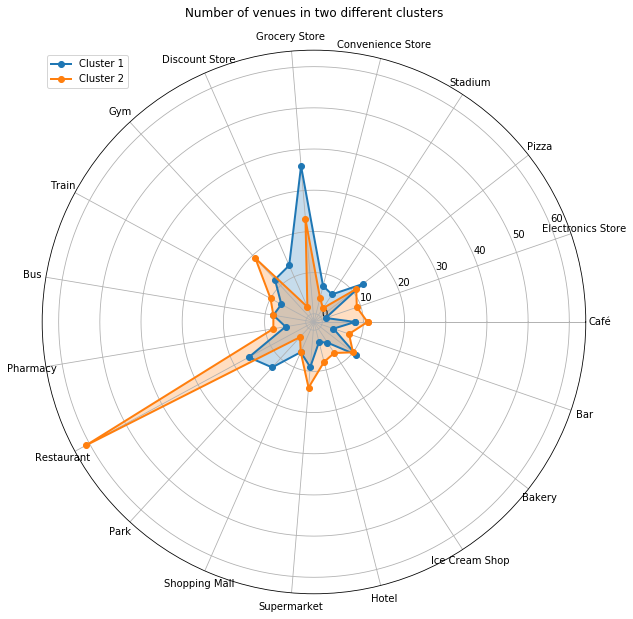

In [230]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

labels=LA12
stats1=DenSwed_merged2.loc[1,labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats1=np.concatenate((stats1,[stats1[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats1, 'o-', linewidth=2, label='Cluster 1')
ax.fill(angles, stats1, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)

stats2=DenSwed_merged2.loc[2,labels].values
stats2=np.concatenate((stats2,[stats2[0]]))

ax.plot(angles, stats2, 'o-', linewidth=2, label='Cluster 2')
ax.fill(angles, stats2, alpha=0.25)

ax.legend(loc=2)
ax.set_title('Number of venues in two different clusters')
ax.grid(True)

# Donut Plot

The next frequent cluster label is 3. A donut plot can shown how the venues are spread in this particular cluster type.

In [207]:
!conda install -c conda-forge palettable

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - palettable


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    palettable-3.3.0           |             py_0          86 KB  conda-forge

The following NEW packages will be INSTALLED:

    palettable: 3.3.0-py_0 conda-forge


palettable-3.3.0     | 86 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [213]:
top10_2 = top15[2][0:10]
print(top10_2)

['Restaurant', 'Grocery Store', 'Gym', 'Supermarket', 'Café', 'Pizza', 'Train', 'Bakery', 'Electronics Store', 'Bus', 'Pharmacy', 'Hotel', 'Bar', 'Ice Cream Shop']


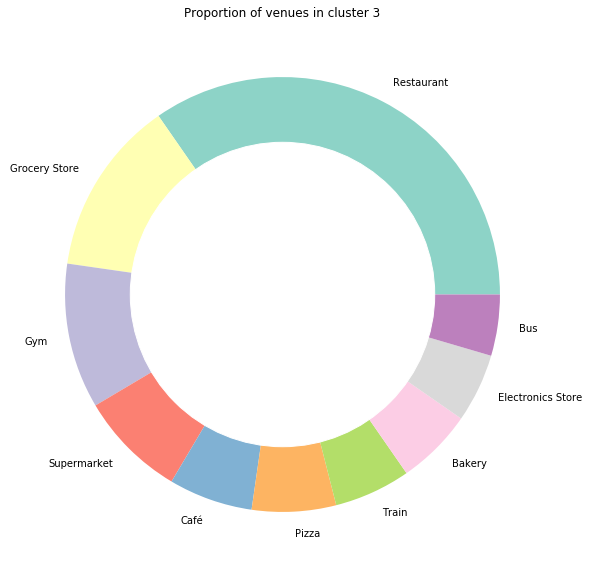

In [229]:
# create data
clusterR3=DenSwed_merged2.loc[[2]]
clusterR3 = clusterR3.loc[:, (clusterR3 != 0).any(axis=0)]
names = top10_2
size=clusterR3.loc[2,names].values
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(15,10))
# Give color names
from palettable.colorbrewer.qualitative import Set3_10
plt.pie(size, labels=names, colors=Set3_10.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
p.gca().set_title('Proportion of venues in cluster 3')
plt.show()

# WordCloud

And finally, the wordcloud tool is used to display the most seen venues in cluster label 0.

In [235]:
# Libraries
#!conda install -c anaconda xlrd --yes
!conda install -c conda-forge wordcloud
from wordcloud import WordCloud

from PIL import Image
import matplotlib.pyplot as plt

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.5.0            |py36h14c3975_1000         183 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.5.0-py36h14c3975_1000 conda-forge


wordcloud-1.5.0      | 183 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [233]:
clusterR0 = DenSwed_merged2.iloc[[0]].drop('Cluster Label', axis=1)
clusterR0.sort_values(0, axis=1, ascending=False, inplace=True, kind='quicksort', na_position='last')

clusterR0 = clusterR0.loc[:, (clusterR0 != 0).any(axis=0)]
Venues0_dict = clusterR0[0:14].to_dict('records')
#print(Venues4_dict[0])

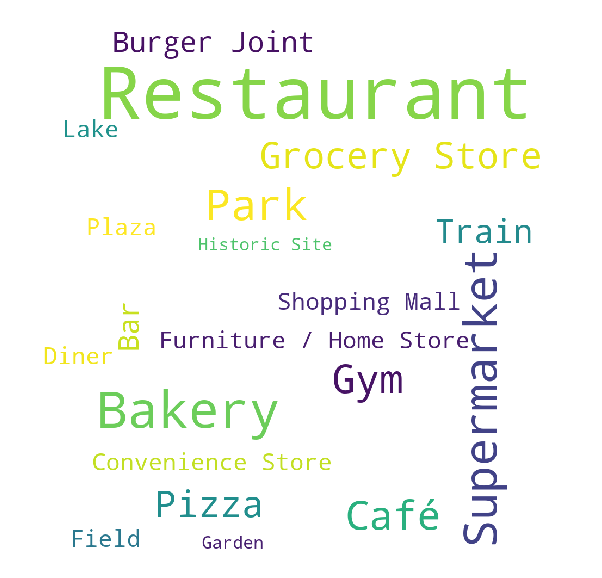

In [236]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(Venues0_dict[0])
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc)